<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Podcast%20topic%20classification/Models/Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Models
---

### Grouping models

#### K-Means

De la figura que presenta la representación de *Word2Vec* de los textos a analizar puede observarse que vale la pena realizar un modelo de agrupamiento que permita identificar grupos de texto con características similares. Uno de los modelos más utilizados y sencillos para esta tarea es *K-Means*, para lo cual hacemos uso de **`sklearn.cluster.KMeans`** y como primer modelo establecemos el número de clusters en 5:

In [ ]:
clf_kmeans = KMeans(n_clusters=5)
clf_kmeans.fit(X_w2v)

KMeans(n_clusters=5)

In [ ]:
clusters_kmeans = clf_kmeans.predict(X_w2v)
clusters_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3])

Luego de entrenar el modelo y predecir a cuál cluster pertenece cada episodio, puede realizarse nuevamente un gráfico con las clasificaciones que genera *K-Means*:

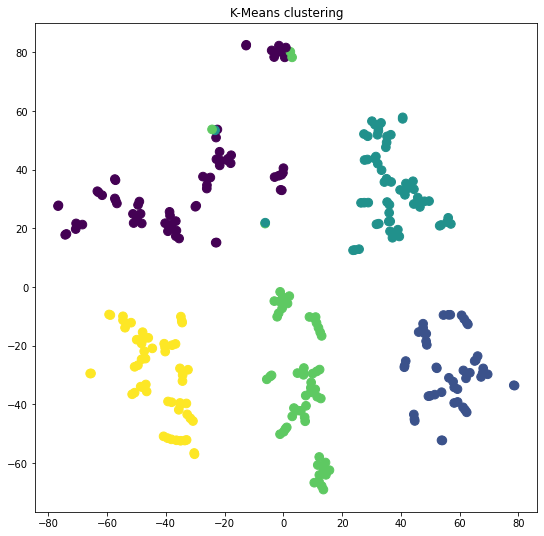

In [ ]:
plt.figure(figsize=(9, 9))
# Mostramos las representaciones con el color dado por K-Means
plt.scatter(T[:, 0], T[:, 1], c=clusters_kmeans, s = 75)
plt.title('K-Means clustering');

donde se observa una clasificación similar a la de las etiquetas originales. Sin profundizar en detalles cuantitativos, es posible determinar un número *k* de clusters adecuado implementando el método del "codo", para lo cual se realiza *K-Means* de 1 a 25 clusters:

In [ ]:
ks = np.arange(1, 26)
# Lista con la pérdida del modelo de K-means para diferente número de clusters
scores_kmeans = [-KMeans(n_clusters=k).fit(X_w2v).score(X_w2v) for k in ks]

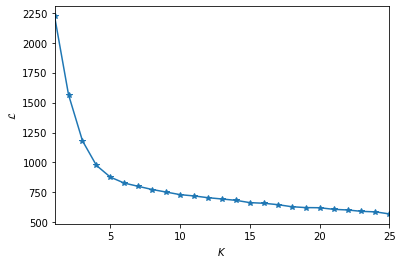

In [ ]:
plt.plot(ks,scores_kmeans,"*-")
plt.xlim([ks.min(), ks.max()])
plt.xlabel("$K$");
plt.ylabel("$\mathcal{L}$");

Del método anterior se aprecia que el "codo" no es tan pronunciado, sin embargo puede afirmarse que el número adecuado de clusters está entre $K=4$ y $K=5$. Se retomará esta discusión en la sección de evaluación.

#### Affinity Propagation

Otro de los modelos que pueden implementarse para agrupamiento, similar a K-Means, es *Affinity Propagation*. Por lo tanto, haciendo uso de **`sklearn.cluster.AffinityPropagation`** entrenamos el siguiente modelo:

In [ ]:
clf_ap = AffinityPropagation(damping=0.98, max_iter=1000)
clf_ap.fit(X_w2v)

clusters_ap = clf_ap.predict(X_w2v)

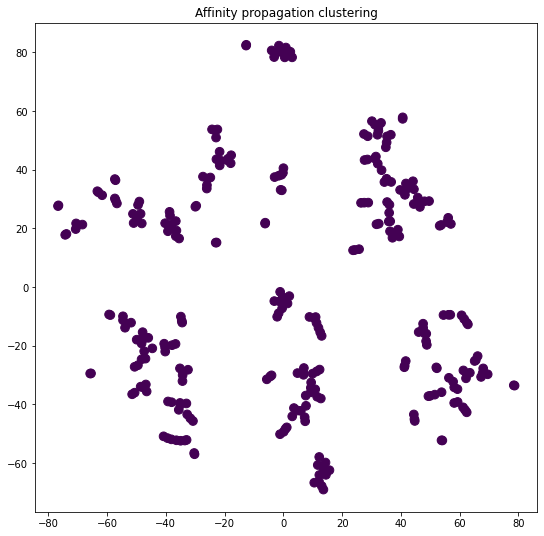

In [ ]:
plt.figure(figsize=(9, 9))
# Visualizamos las representaciones con la predicción
# de Affinity Propagation
plt.scatter(T[:, 0], T[:, 1], c=clusters_ap, s = 75)
plt.title('Affinity propagation clustering');

Para el modelo anterior fue necesario usar un "damping" bastante cercano a 1 para obtener un número de clusters razonable comparado con el análisis visual de la representación *Word2Vec*, razón por la cual este modelo no será evaluado posteriormente.

#### Gaussian Mixture Model

Por otro lado, el último de los modelos de agrupamiento a estudiar es el *Gaussian Mixture Model* (GMM), el cual también requiere de especificar el número de clusters al definir dicho modelo. Nuevamente se tomarán 5 clusters para hacer comparación con las etiquetas de cada podcast, así que entrenándolo con **`sklearn.mixture.GaussianMixture`**:

In [ ]:
model_gaussm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
model_gaussm.fit(X_w2v)

pred = model_gaussm.predict(X_w2v)

In [ ]:
!pip install --upgrade numpy==1.21.4

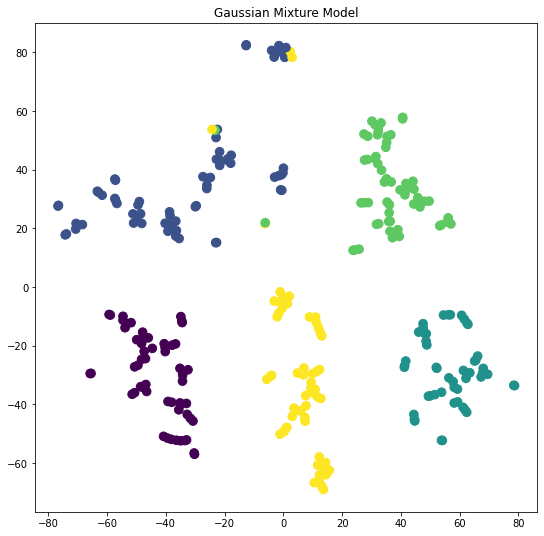

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(T[:,0], T[:,1], c=pred, s=75)
plt.title("Gaussian Mixture Model");

El cual presenta una clasificación bastante similar a la vista por parte del modelo de *K-Means*. Posteriormente se analizarán las diferencias entre cada uno de estos modelos.